# Linear Regression

## Generate sample data

In [1]:
import numpy as np

In [2]:
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

In [3]:
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

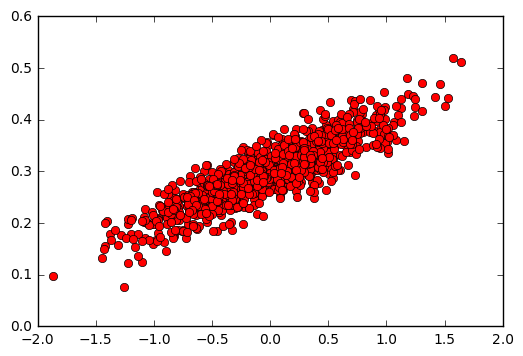

In [5]:
plt.plot(x_data, y_data, 'ro')
plt.show()

In [6]:
import tensorflow as tf

## Build flow of tensors

In [7]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

## Print shapes

In [8]:
print('x', len(x_data))
print('W', W.get_shape())
print('b', b.get_shape())
print('y', y.get_shape())

x 1000
W (1,)
b (1,)
y (1000,)


> Shape broadcasting으로 인해 `W`, `b`가 복제되어 `W`, `b`의 shape가 `x`와 같아집니다.

## Cost function: Mean Square Error(MSE)

In [9]:
loss = tf.reduce_mean(tf.square(y - y_data))

## Optimizer: Gradient Descent

In [10]:
optimizer = tf.train.GradientDescentOptimizer(0.5)

## Define `train` operation

In [11]:
train = optimizer.minimize(loss)

In [12]:
train

> `train`이라는 operation은 `optimizer`가 `loss`를 최소화하는 것이라 정의

## Create TensorFlow session & initialize all variables

In [13]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

## Train

0 [-0.65286732] [ 0.28368711] 0.178333


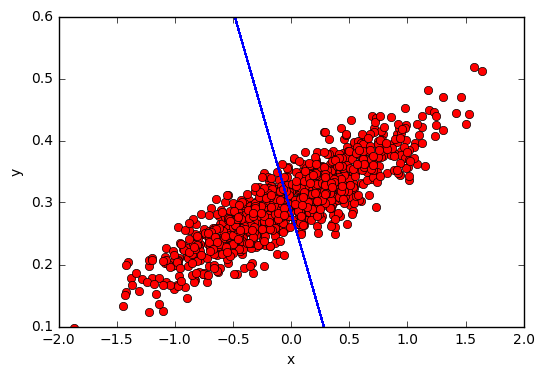

1 [-0.41698533] [ 0.2889584] 0.0844593


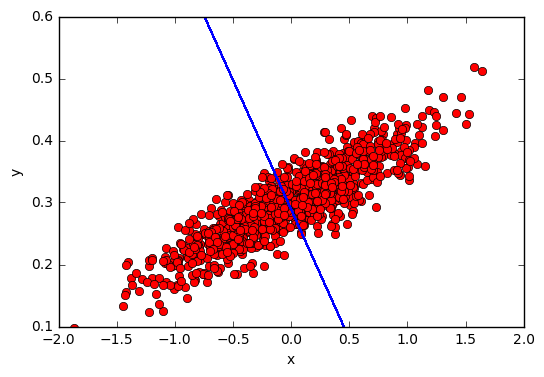

2 [-0.25509882] [ 0.29264352] 0.0402429


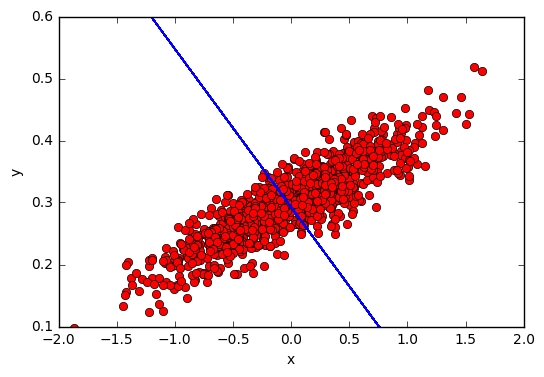

3 [-0.14399454] [ 0.2951726] 0.0194161


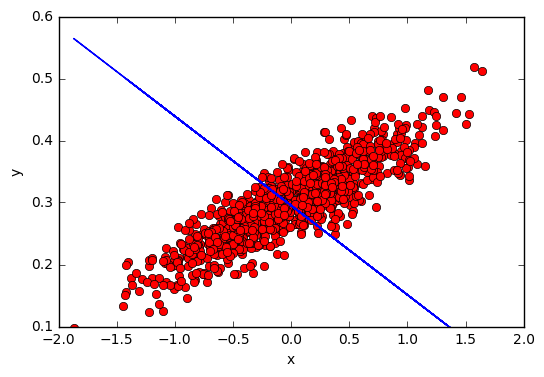

4 [-0.06774266] [ 0.29690835] 0.00960619


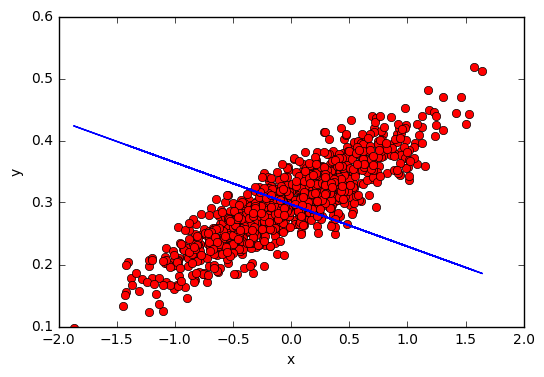

5 [-0.01541028] [ 0.29809961] 0.00498553


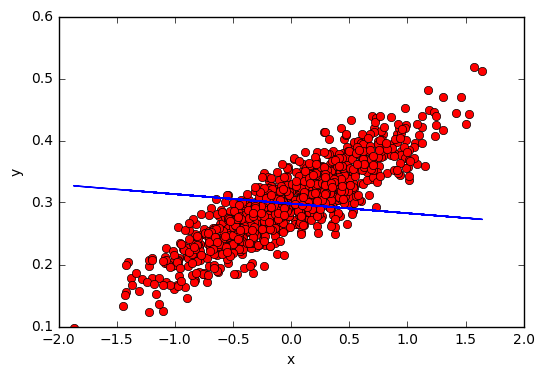

6 [ 0.02050593] [ 0.29891717] 0.00280911


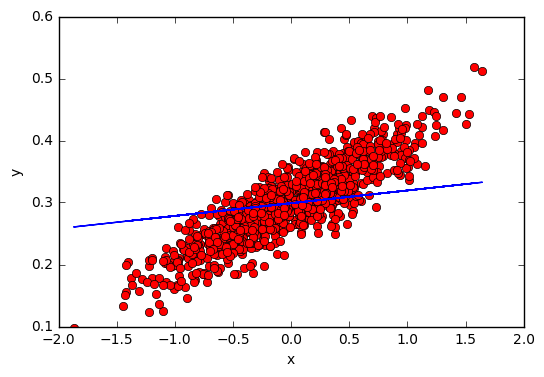

7 [ 0.04515557] [ 0.29947826] 0.00178397


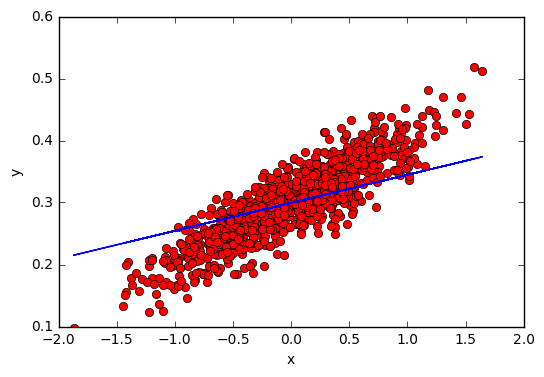

8 [ 0.06207284] [ 0.29986337] 0.00130111


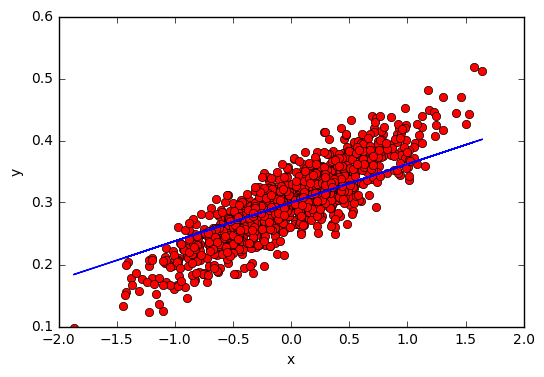

9 [ 0.07368333] [ 0.30012766] 0.00107367


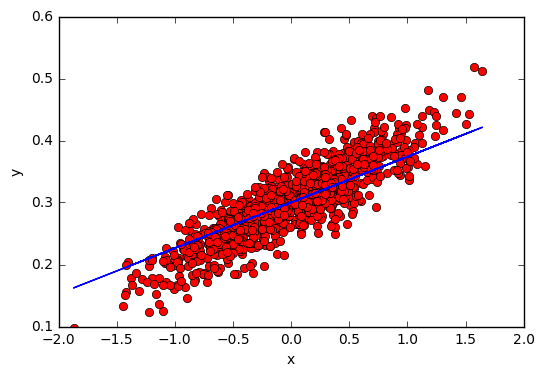

In [14]:
for step in range(10):
    
    # Run train operation
    sess.run(train)
    
    # Print variables
    print(step, sess.run(W), sess.run(b), sess.run(loss))
    
    # scatter plot of data with red circle markers
    plt.plot(x_data, y_data, 'ro')
    # draw line
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-2, 2)
    plt.ylim(0.1, 0.6)
    plt.show()